# 1. Lý thuyết

1)  Đặc diểm của kiến trúc RNN là gì ?

A. RNN là kiến trúc dự báo có tính thứ tự và tính truy hồi. Các dự báo được thực hiện theo tuần tự thời gian và output của các step trong tương lai được sử dụng như input của step hiện tại.

B. RNN là kiến trúc dự báo có tính thứ tự và tính truy hồi. Các dự báo được thực hiện một cách song song và output của các step trước được sử dụng như input của step hiện tại.

C. RNN là kiến trúc dự báo có tính thứ tự và tính truy hồi. Các dự báo được thực hiện theo tuần tự thời gian và output của các step trước được sử dụng như input của step hiện tại.

D. RNN là kiến trúc dự báo có tính thứ tự và tính truy hồi. Các dự báo được thực hiện theo chiều từ phải sang trái cho tới khi trở về vị trí đầu tiên.

2) Nhận định nào sau đây là đúng về RNN?

A. Kiến trúc RNN dự báo song song các output một lúc.

B. Kiến trúc RNN không chia sẻ tham số giữa các units. Do đó kích thước mạng sẽ gia tăng theo độ dài văn bản.

C. Kiến trúc RNN có thể tổng hợp được thông tin trong tương lai để dự báo hiện tại.

D. Kiến trúc RNN chia sẻ tham số trên toàn bộ các units nên số lượng tham số không phụ thuộc vào độ dài văn bản.

3) Để huấn luyện mạng RNN thì một chú ý quan trọng tại time step t=0 chúng ta cần làm gì ?

A. Mã hóa từ đầu vào thành một ma trận đại số.

B. Khởi tạo ngẫu nhiên một véc tơ kích hoạt $a^{<0>}$ như một giá trị phân phối xác suất của biến mục tiêu.

C. Khởi tạo ngẫu nhiên một véc tơ kích hoạt $a^{<0>}$ như một giá trị có tác dụng mã hóa biểu diễn cho từ đầu vào tại bước $t=0$.

D. Khởi tạo ngẫu nhiên một véc tơ kích hoạt $a^{<0>}$ như một giá trị có tác dụng kích hoạt tính toán.

4) Sự khác biệt giữa RNN và CNN là gì?

A. RNN là kiến trúc truy hồi có thể trả ra kết quả dự báo ở nhiều timestep. CNN không có khả năng truy hồi để dự báo theo timestep

B. RNN có tính truy hồi và kiến trúc không chia sẻ tham số giữa các units. Trong khi CNN chia sẻ tham số ở phân phối xác suất đầu ra. 

C. RNN có số lượng tham số thay đổi theo độ dài văn bản. Trong khi đó CNN luôn có số lượng tham số xác định trước.

D. RNN có thể dự báo theo một chiều trong khi CNN chỉ dự báo được theo hai chiều.

5) Véc tơ context trong kiến trúc LSTM và GRU có tác dụng gì ?

A. Là véc tơ biểu diễn của đầu vào $x_t$ tại mỗi bước.

B. Ghi nhận bối cảnh xuyên suốt toàn bộ chuỗi tính đến thời điểm hiện tại

C. Là véc tơ cập nhật và loại bỏ thông tin mới tại mỗi bước.

D. Kích hoạt thông tin tại mỗi timestep


1. C

2. D

3. D

4. A

5. B



# 2. Thực hành


6. Từ bộ dữ liệu [Sentiment-analysis-on-movie-reviews](https://www.kaggle.com/competitions/sentiment-analysis-on-movie-reviews/data) hãy sử dụng các thuật toán trong RNN để huấn luyện mô hình phân loại cảm xúc văn bản. (1 điểm)

7. Sử dụng mô hình LSTM để dự báo tổng số lượng khách hàng sử dụng dịch vụ hàng không [air- passengers](https://www.kaggle.com/datasets/rakannimer/air-passengers) (2 điểm)

8. Xây dựng một mô hình thêm dấu Tiếng Việt sử dụng LSTM. Cách xử lý để tạo bộ dữ liệu có thể tham khảo tại [them dau tieng viet](https://phamdinhkhanh.github.io/2020/05/28/TransformerThemDauTV.html#1-d%E1%BB%AF-li%E1%BB%87u). (2 điểm)



# 6

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset
import torch.functional as F

import unicodedata, re, string
import nltk

In [ ]:
%cd /content/drive/MyDrive/TwDS
!ls

/content/drive/MyDrive/TwDS
105_classes_pins_dataset  face-data.zip		 test.tsv      train.tsv.zip
5.CNN_VuXuanHien.ipynb	  income_model.pth	 test.tsv.zip
Cat_dog_dataset		  sample_submission.csv  train.csv
data			  test.csv		 train.tsv


In [ ]:
# !unzip train.tsv.zip
# !unzip test.tsv.zip

In [ ]:
!ls

105_classes_pins_dataset  face-data.zip		 test.tsv      train.tsv.zip
5.CNN_VuXuanHien.ipynb	  income_model.pth	 test.tsv.zip
Cat_dog_dataset		  sample_submission.csv  train.csv
data			  test.csv		 train.tsv


In [ ]:
train = pd.read_csv('train.tsv', sep='\t')

In [ ]:
train

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2
...,...,...,...,...
156055,156056,8544,Hearst 's,2
156056,156057,8544,forced avuncular chortles,1
156057,156058,8544,avuncular chortles,3
156058,156059,8544,avuncular,2


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156060 entries, 0 to 156059
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   PhraseId    156060 non-null  int64 
 1   SentenceId  156060 non-null  int64 
 2   Phrase      156060 non-null  object
 3   Sentiment   156060 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 4.8+ MB


In [ ]:
train['Sentiment'].value_counts()

2    79582
3    32927
1    27273
4     9206
0     7072
Name: Sentiment, dtype: int64

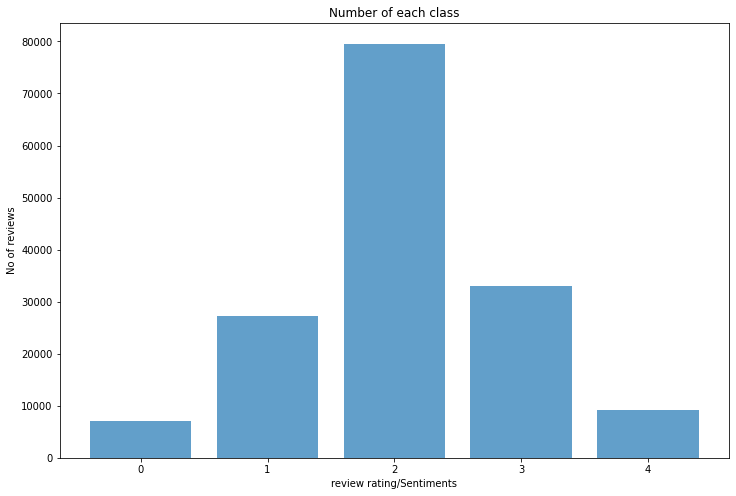

In [ ]:
unique_elements, counts_elements = np.unique(train['Sentiment'], return_counts=True)

y_pos = np.arange(len(unique_elements))
plt.figure(figsize=(12,8))
plt.bar(unique_elements, counts_elements, align='center', alpha=0.7)
plt.xlabel('review rating/Sentiments')
plt.ylabel('No of reviews')
plt.xticks(y_pos, unique_elements)
plt.title('Number of each class')
plt.show()

In [ ]:
pip install --upgrade nltk

     |████████████████████████████████| 1.5 MB 5.1 MB/s 
     |████████████████████████████████| 749 kB 53.3 MB/s 
  Attempting uninstall: regex
    Found existing installation: regex 2019.12.20
    Uninstalling regex-2019.12.20:
      Successfully uninstalled regex-2019.12.20
  Attempting uninstall: nltk
    Found existing installation: nltk 3.2.5
    Uninstalling nltk-3.2.5:
      Successfully uninstalled nltk-3.2.5


In [ ]:
def remove_non_ascii(words):
    """Remove non-ASCII characters from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
        new_words.append(new_word)
    return new_words

def to_lowercase(words):
    """Convert all characters to lowercase from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = word.lower()
        new_words.append(new_word)
    return new_words

def remove_punctuation(words):
    """Remove punctuation from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = re.sub(r'[^\w\s]', '', word)
        if new_word != '':
            new_words.append(new_word)
    return new_words

def remove_numbers(words):
    """Remove all interger occurrences in list of tokenized words with textual representation"""
    new_words = []
    for word in words:
        new_word = re.sub("\d+", "", word)
        if new_word != '':
            new_words.append(new_word)
    return new_words

def normalize(words):
    words = remove_non_ascii(words)
    words = to_lowercase(words)
    words = remove_punctuation(words)
    words = remove_numbers(words)
    return words

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
train['Words'] = train['Phrase'].apply(nltk.word_tokenize)

train['Words'] = train['Words'].apply(normalize) 
train['Words'].head()

0    [a, series, of, escapades, demonstrating, the,...
1    [a, series, of, escapades, demonstrating, the,...
2                                          [a, series]
3                                                  [a]
4                                             [series]
Name: Words, dtype: object

In [ ]:
word_set = set()
for l in train['Words']:
    for e in l:
        word_set.add(e)
        
word_to_int = {word: ii for ii, word in enumerate(word_set, 1)}

# Check if they are still the same lenght
print(len(word_set))
print(len(word_to_int))

16209
16209


In [ ]:
train['Tokens'] = train['Words'].apply(lambda l: [word_to_int[word] for word in l])
train['Tokens'].head()

0    [16021, 221, 4792, 12695, 4660, 11137, 4709, 1...
1    [16021, 221, 4792, 12695, 4660, 11137, 4709, 1...
2                                         [16021, 221]
3                                              [16021]
4                                                [221]
Name: Tokens, dtype: object

In [ ]:
max_len = train['Tokens'].str.len().max()
print(max_len)

48


In [ ]:
all_tokens = np.array([t for t in train['Tokens']])
encoded_labels = np.array([l for l in train['Sentiment']])

# Create blank rows
features = np.zeros((len(all_tokens), max_len), dtype=int)
# for each phrase, add zeros at the end 
for i, row in enumerate(all_tokens):
    features[i, :len(row)] = row

#print first 3 values of the feature matrix 
print(features[:3])


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  """Entry point for launching an IPython kernel.


[[16021   221  4792 12695  4660 11137  4709 14416 11512  4725  8503  5178
  11137 14229  4725   796  8503  5178 11137 12578 11278  4792 12731 13150
    204  3622 14278  4792 12731 14879 13865  5670  4792 16021  4235     0
      0     0     0     0     0     0     0     0     0     0     0     0]
 [16021   221  4792 12695  4660 11137  4709 14416 11512  4725  8503  5178
  11137 14229     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0]
 [16021   221     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0]]


In [ ]:
split_frac = 0.8

## split data into training, validation, and test data (features and labels, x and y)

split_idx = int(len(features)*0.8)
train_x, remaining_x = features[:split_idx], features[split_idx:]
train_y, remaining_y = encoded_labels[:split_idx], encoded_labels[split_idx:]

test_idx = int(len(remaining_x)*0.5)
val_x, test_x = remaining_x[:test_idx], remaining_x[test_idx:]
val_y, test_y = remaining_y[:test_idx], remaining_y[test_idx:]

In [ ]:
train_data = TensorDataset(torch.from_numpy(train_x), torch.from_numpy(train_y))
valid_data = TensorDataset(torch.from_numpy(val_x), torch.from_numpy(val_y))
test_data = TensorDataset(torch.from_numpy(test_x), torch.from_numpy(test_y))

# dataloaders
batch_size = 54

# make sure the SHUFFLE your training data
train_loader = DataLoader(train_data, shuffle=True, batch_size=batch_size)
valid_loader = DataLoader(valid_data, shuffle=True, batch_size=batch_size)
test_loader = DataLoader(test_data, shuffle=True, batch_size=batch_size)

# Check the size of the loaders (how many batches inside)
print(len(train_loader))
print(len(valid_loader))
print(len(test_loader))

2312
289
289


In [ ]:
train_on_gpu=torch.cuda.is_available()

if(train_on_gpu):
    print('Training on GPU.')
else:
    print('No GPU available, training on CPU.')

Training on GPU.


In [ ]:
class SentimentRNN(nn.Module):
    """
    The RNN model that will be used to perform Sentiment analysis.
    """

    def __init__(self, vocab_size, output_size, embedding_dim, hidden_dim, n_layers, drop_prob=0.5):
        """
        Initialize the model by setting up the layers.
        """
        super(SentimentRNN, self).__init__()

        self.output_size = output_size
        self.n_layers = n_layers
        self.hidden_dim = hidden_dim
        
        # embedding and LSTM layers
        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        self.lstm = nn.LSTM(embedding_dim, hidden_dim, n_layers, 
                            dropout=drop_prob, batch_first=True)
        
        # dropout layer
        self.dropout = nn.Dropout(0.3)
        
        # linear
        self.fc = nn.Linear(hidden_dim, output_size)
        
    def forward(self, x, hidden):
        """
        Perform a forward pass of our model on some input and hidden state.
        """
        batch_size = x.size(0)

        # embeddings and lstm_out
        embeds = self.embedding(x)

        lstm_out, hidden = self.lstm(embeds, hidden)

        # transform lstm output to input size of linear layers
        lstm_out = lstm_out.transpose(0,1)
        lstm_out = lstm_out[-1]

        out = self.dropout(lstm_out)
        out = self.fc(out)        

        return out, hidden
    
    def init_hidden(self, batch_size):
        ''' Initializes hidden state '''
        # Create two new tensors with sizes n_layers x batch_size x hidden_dim,
        # initialized to zero, for hidden state and cell state of LSTM
        weight = next(self.parameters()).data
        
        if (train_on_gpu):
            hidden = (weight.new(self.n_layers, batch_size, self.hidden_dim).zero_().cuda(),
                  weight.new(self.n_layers, batch_size, self.hidden_dim).zero_().cuda())
        else:
            hidden = (weight.new(self.n_layers, batch_size, self.hidden_dim).zero_(),
                      weight.new(self.n_layers, batch_size, self.hidden_dim).zero_())
        
        return hidden

In [ ]:
vocab_size = len(word_to_int)+1 # +1 for the 0 padding
output_size = 5
embedding_dim = 400
hidden_dim = 256
n_layers = 2

net = SentimentRNN(vocab_size, output_size, embedding_dim, hidden_dim, n_layers)

print(net)

SentimentRNN(
  (embedding): Embedding(16210, 400)
  (lstm): LSTM(400, 256, num_layers=2, batch_first=True, dropout=0.5)
  (dropout): Dropout(p=0.3, inplace=False)
  (fc): Linear(in_features=256, out_features=5, bias=True)
)


In [ ]:
lr=0.001

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(net.parameters(), lr=lr)

In [ ]:
epochs = 2

counter = 0
print_every = 100
clip=5 # gradient clipping

if(train_on_gpu):
    net.cuda()

net.train()
for e in range(epochs):
    # initialize hidden state
    h = net.init_hidden(batch_size)

    # batch loop
    for inputs, labels in train_loader:
        counter += 1

        if(train_on_gpu):
            inputs, labels = inputs.cuda(), labels.cuda()

        # Creating new variables for the hidden state, otherwise
        # we'd backprop through the entire training history
        h = tuple([each.data for each in h])

        # zero accumulated gradients
        net.zero_grad()

        # get the output from the model
        output, h = net(inputs, h)
        # calculate the loss and perform backprop
        loss = criterion(output, labels)
        loss.backward()
        # `clip_grad_norm` helps prevent the exploding gradient problem in RNNs / LSTMs.
        nn.utils.clip_grad_norm_(net.parameters(), clip)
        optimizer.step()

        # loss stats
        if counter % print_every == 0:
            # Get validation loss
            val_h = net.init_hidden(batch_size)
            val_losses = []
            net.eval()
            for inputs, labels in valid_loader:

                # Creating new variables for the hidden state, otherwise
                # we'd backprop through the entire training history
                val_h = tuple([each.data for each in val_h])

                if(train_on_gpu):
                    inputs, labels = inputs.cuda(), labels.cuda()

                output, val_h = net(inputs, val_h)
                val_loss = criterion(output, labels)

                val_losses.append(val_loss.item())

            net.train()
            print("Epoch: {}/{}...".format(e+1, epochs),
                  "Step: {}...".format(counter),
                  "Loss: {:.6f}...".format(loss.item()),
                  "Val Loss: {:.6f}".format(np.mean(val_losses)))

Epoch: 1/2... Step: 100... Loss: 1.375029... Val Loss: 1.304532
Epoch: 1/2... Step: 200... Loss: 1.385780... Val Loss: 1.302990
Epoch: 1/2... Step: 300... Loss: 1.411084... Val Loss: 1.301531
Epoch: 1/2... Step: 400... Loss: 1.215061... Val Loss: 1.301483
Epoch: 1/2... Step: 500... Loss: 1.222498... Val Loss: 1.302177
Epoch: 1/2... Step: 600... Loss: 1.269924... Val Loss: 1.302317
Epoch: 1/2... Step: 700... Loss: 1.135276... Val Loss: 1.252147
Epoch: 1/2... Step: 800... Loss: 1.342501... Val Loss: 1.244113
Epoch: 1/2... Step: 900... Loss: 1.258608... Val Loss: 1.238761
Epoch: 1/2... Step: 1000... Loss: 1.149502... Val Loss: 1.221218
Epoch: 1/2... Step: 1100... Loss: 1.231756... Val Loss: 1.217385
Epoch: 1/2... Step: 1200... Loss: 1.216659... Val Loss: 1.205774
Epoch: 1/2... Step: 1300... Loss: 1.238448... Val Loss: 1.194823
Epoch: 1/2... Step: 1400... Loss: 1.112091... Val Loss: 1.194394
Epoch: 1/2... Step: 1500... Loss: 1.117093... Val Loss: 1.185034
Epoch: 1/2... Step: 1600... Loss: 

# 7

In [ ]:
from torch.autograd import Variable
from sklearn.preprocessing import MinMaxScaler

In [ ]:
!ls

105_classes_pins_dataset  data			 test.csv      train.tsv
5.CNN_VuXuanHien.ipynb	  face-data.zip		 test.tsv      train.tsv.zip
AirPassengers.csv	  income_model.pth	 test.tsv.zip
Cat_dog_dataset		  sample_submission.csv  train.csv


In [ ]:
data = pd.read_csv('AirPassengers.csv', header=0, index_col=0)
data.head()

,#Passengers
Month,
1949-01,112
1949-02,118
1949-03,132
1949-04,129
1949-05,121


In [ ]:
from datetime import datetime

data.index = list(
      map(
          lambda x: datetime.strptime(x, '%Y-%m'), 
          list(data.index)
          )
    )

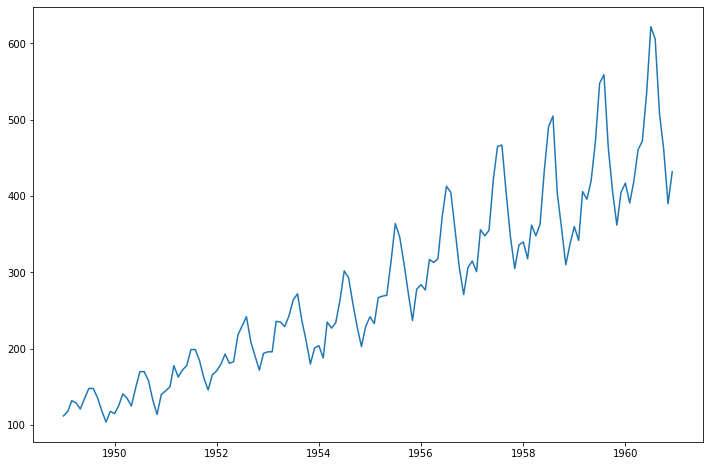

In [ ]:
plt.figure(figsize=(12, 8))
plt.plot(data, label = 'Airline Passangers Data')
plt.show()

In [ ]:
def sliding_windows(data, seq_length):
    x = []
    y = []
    for i in range(len(data)-seq_length-1):
        _x = data[i:(i+seq_length)] # seq_length-1
        _y = data[i+seq_length]
        x.append(_x)
        y.append(_y)

    return np.array(x),np.array(y)

In [ ]:
# X = data['#Passengers'].values

# Scaling dataset
sc = MinMaxScaler()
data = sc.fit_transform(X.reshape(-1, 1))

# Create sliding windows=4
seq_length = 3
x, y = sliding_windows(data, seq_length)

# Train/test split
train_size = int(len(y) * 0.7)
test_size = len(y) - train_size

# Convert into variable
dataX = torch.Tensor(np.array(x))
dataY = torch.Tensor(np.array(y))

trainX = torch.Tensor(np.array(x[0:train_size]))
trainY = torch.Tensor(np.array(y[0:train_size]))

testX = torch.Tensor(np.array(x[train_size:len(x)]))
testY = torch.Tensor(np.array(y[train_size:len(y)]))

In [ ]:
print(trainX.shape, trainY.shape)
print(testX.shape, testY.shape)

torch.Size([98, 3, 1]) torch.Size([98, 1])
torch.Size([42, 3, 1]) torch.Size([42, 1])


In [ ]:
class LSTM(nn.Module):
    def __init__(self, num_classes, input_size, hidden_size, num_layers):
        '''
        num_classes: number of output values
        input_size: length of input
        hidden_size: embedding vector for at, xt
        num_layers: total number of RNN layers

        '''
        super(LSTM, self).__init__()
        
        self.num_classes = num_classes
        self.num_layers = num_layers
        self.input_size = input_size
        self.hidden_size = hidden_size
        
        # https://pytorch.org/docs/stable/generated/torch.nn.LSTM.html
        self.lstm = nn.LSTM(input_size=input_size, hidden_size=hidden_size,
                            num_layers=num_layers, batch_first=True)
        
        self.fc = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        
        a_0 = torch.zeros(
            self.num_layers, x.size(0), self.hidden_size)
        
        c_0 = torch.zeros(
            self.num_layers, x.size(0), self.hidden_size)
        
        # Propagate input through LSTM
        ula, (a_out, c_out) = self.lstm(x, (a_0, c_0))
        
        a_out = a_out.view(-1, self.hidden_size) # N * hidden_size
      
        out = self.fc(a_out) # N * num_classes
        
        return out

In [ ]:
# 1. Declare paramters:
# Training parameters
num_epochs = 1500
learning_rate = 0.01

# Model parameters
input_size = 1
hidden_size = 2
num_layers = 1
num_classes = 1

# 2. Initialize model
lstm = LSTM(num_classes, input_size, hidden_size, num_layers)

# 3. Optimizer
criterion = torch.nn.MSELoss()    # mean-squared error for regression
optimizer = torch.optim.Adam(lstm.parameters(), lr=learning_rate)

# 4. Train the model
for epoch in range(num_epochs):
    # 4.a. Feed forward
    outputs = lstm(trainX)

    # Don't for get to reset optimizer into zero
    optimizer.zero_grad()

    loss = criterion(outputs, trainY)

    # 4.b. Back propagation    
    # obtain the loss function
    loss.backward()
    optimizer.step()

    if epoch % 100 == 0:
      print("Epoch: %d, loss: %1.5f" % (epoch, loss.item()))

Epoch: 0, loss: 0.08815
Epoch: 100, loss: 0.00378
Epoch: 200, loss: 0.00297
Epoch: 300, loss: 0.00238
Epoch: 400, loss: 0.00198
Epoch: 500, loss: 0.00185
Epoch: 600, loss: 0.00184
Epoch: 700, loss: 0.00183
Epoch: 800, loss: 0.00182
Epoch: 900, loss: 0.00181
Epoch: 1000, loss: 0.00179
Epoch: 1100, loss: 0.00177
Epoch: 1200, loss: 0.00175
Epoch: 1300, loss: 0.00173
Epoch: 1400, loss: 0.00171


# 8

In [ ]:
!ls

105_classes_pins_dataset  income_model.pth	 train.csv
5.CNN_VuXuanHien.ipynb	  output		 train_tieng_viet.txt
AirPassengers.csv	  sample_submission.csv  train.tsv
Cat_dog_dataset		  test.csv		 train.tsv.zip
data			  test.tsv
face-data.zip		  test.tsv.zip


In [ ]:
import string
import re
# https://realpython.com/python-encodings-guide/
# List các ký tự hợp lệ trong tiếng Việt
intab_l = "ạảãàáâậầấẩẫăắằặẳẵóòọõỏôộổỗồốơờớợởỡéèẻẹẽêếềệểễúùụủũưựữửừứíìịỉĩýỳỷỵỹđ"
ascii_lowercase = 'abcdefghijklmnopqrstuvwxyz'
digits = '0123456789'
punctuation = r"""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""
whitespace = ' '
accept_strings =  intab_l + ascii_lowercase + digits + punctuation + whitespace
r = re.compile('^[' + accept_strings + ']+$')


# Một câu sẽ được coi là hợp lệ nếu có các ký tự nằm trong accept_strings
def _check_tieng_viet(seq):
  if re.match(r, seq.lower()):
    return True
  else:
    return False

_check_tieng_viet('tiếng việt là ngôn ngữ của tôi')

True

In [ ]:
with open('train_tieng_viet.txt', 'r', encoding='utf-8') as f:
  train_output = f.readlines()

print('Number of sequences: ', len(train_output))
print('First sequence: ', train_output[0])

Number of sequences:  3624432
First sequence:  0000000000	Trang Chính



In [ ]:
# encoding=utf8
import codecs
import csv
import re
import sys

def remove_tone_line(utf8_str):
    intab_l = "ạảãàáâậầấẩẫăắằặẳẵóòọõỏôộổỗồốơờớợởỡéèẻẹẽêếềệểễúùụủũưựữửừứíìịỉĩýỳỷỵỹđ"
    intab_u = "ẠẢÃÀÁÂẬẦẤẨẪĂẮẰẶẲẴÓÒỌÕỎÔỘỔỖỒỐƠỜỚỢỞỠÉÈẺẸẼÊẾỀỆỂỄÚÙỤỦŨƯỰỮỬỪỨÍÌỊỈĨÝỲỶỴỸĐ"
    intab = list(intab_l+intab_u)

    outtab_l = "a"*17 + "o"*17 + "e"*11 + "u"*11 + "i"*5 + "y"*5 + "d"
    outtab_u = "A"*17 + "O"*17 + "E"*11 + "U"*11 + "I"*5 + "Y"*5 + "D"
    outtab = outtab_l + outtab_u
    # Khởi tạo regex tìm kiếm các vị trí nguyên âm có dấu 'ạ|ả|ã|...'
    r = re.compile("|".join(intab))

    # Dictionary có key-value là từ có dấu-từ không dấu. VD: {'â' : 'a'}
    replaces_dict = dict(zip(intab, outtab))
    # Thay thế các từ có dấu xuất hiện trong tìm kiếm của regex bằng từ không dấu tương ứng
    non_dia_str = r.sub(lambda m: replaces_dict[m.group(0)], utf8_str)
    return non_dia_str
  
remove_tone_line('Đi một ngày đàng học 1 sàng khôn')

'Di mot ngay dang hoc 1 sang khon'

In [ ]:
# import pickle

# def _save_pickle(filename, obj):
#   with open(filename, 'wb') as f:
#     pickle.dump(obj, f)

# _save_pickle('train_tv_idx_500k.pkl', train_idx_500k)
# _save_pickle('val_tv_idx_50k.pkl', val_idx_50k)
# _save_pickle('test_tv_idx_50k.pkl', test_idx_50k)


In [ ]:
from tqdm import tqdm
train_idx_500k = []
train_opt_500k = []
train_ipt_500k = []
val_idx_50k = []
val_opt_50k = []
val_ipt_50k = []
test_idx_50k = []
test_opt_50k = []
test_ipt_50k = []

for i in tqdm(range(600000)):
  [idx, origin_seq] = train_output[i].split('\t')
  try:
    non_acc_seq = remove_tone_line(origin_seq)
  except:
    print('error remove tone line at sequence {}', str(i))
    next
  if i < 500000:
    train_idx_500k.append(idx)
    train_opt_500k.append(origin_seq)
    train_ipt_500k.append(non_acc_seq)
  elif i < 550000:
    val_idx_50k.append(idx)
    val_opt_50k.append(origin_seq)
    val_ipt_50k.append(non_acc_seq)
  else:
    test_idx_50k.append(idx)
    test_opt_50k.append(origin_seq)
    test_ipt_50k.append(non_acc_seq)

100%|██████████| 600000/600000 [00:35<00:00, 16859.69it/s]


In [ ]:
max_word = len(max(train_ipt_500k, key = len))
max_word

8913

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing import sequence

max_words = 9000
tok = Tokenizer(num_words=max_words)
tok.fit_on_texts(train_ipt_500k)

sequences = tok.texts_to_sequences(train_ipt_500k)
train_matrix = sequence.pad_sequences(sequences, maxlen=max_word)

In [ ]:
max_words = 9000
tok = Tokenizer(num_words=max_words)
tok.fit_on_texts(train_opt_500k)

sequences = tok.texts_to_sequences(train_opt_500k)
text_matrix = sequence.pad_sequences(sequences, maxlen=max_word)

In [ ]:
# Convert into variable
dataX = torch.Tensor(np.array(train_matrix))
dataY = torch.Tensor(np.array(text_matrix))

trainX = torch.Tensor(np.array(x[0:train_size]))
trainY = torch.Tensor(np.array(y[0:train_size]))

testX = torch.Tensor(np.array(x[train_size:len(x)]))
testY = torch.Tensor(np.array(y[train_size:len(y)]))

print(trainX.shape, testX.shape)
print(trainY.shape, testY.shape)

In [ ]:
for epoch in range(num_epochs):
    # 4.a. Feed forward
    outputs = lstm(train_examples)

    # Don't for get to reset optimizer into zero
    optimizer.zero_grad()

    loss = criterion(outputs, val_examples)

    # 4.b. Back propagation    
    # obtain the loss function
    loss.backward()
    optimizer.step()

    if epoch % 100 == 0:
      print("Epoch: %d, loss: %1.5f" % (epoch, loss.item()))